## Import the required libraries

In [2]:
# Import the require library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/HP/Documents/bkup doc-sept2024/Project MACHINE LEARNING/Customer Segmentation Using Unsupervised Machine Learning/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis


## Exploratory data analysis (EDA) 

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Visualize the distribution of annual income among customers.

Is used in mall customer segmentation for exploratory data analysis (EDA), specifically to visualize the distribution of annual income among customers.

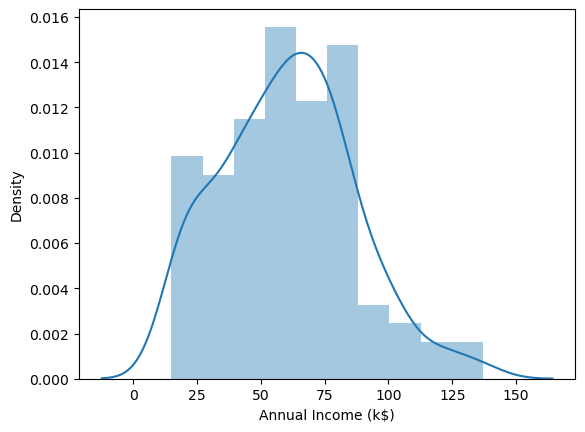

In [5]:
sns.distplot(df['Annual Income (k$)']);

Simuilarly visualization of Gender, Age, Annual Income and spending score

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

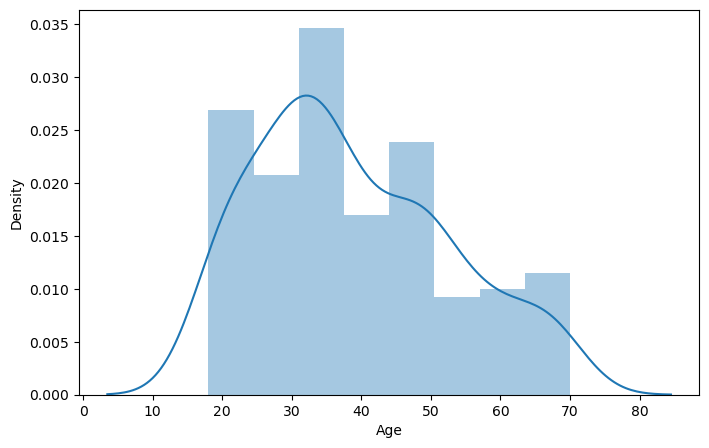

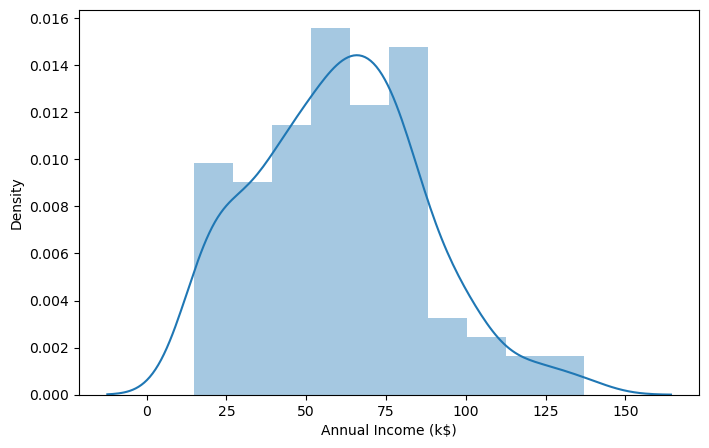

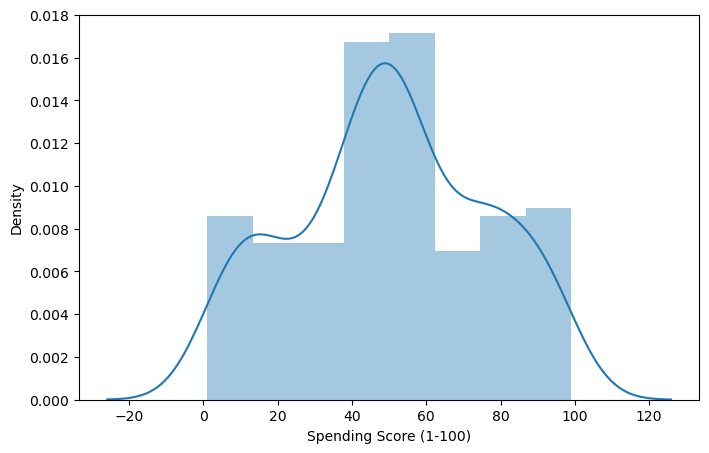

In [7]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(8,5))
    sns.distplot(df[i])

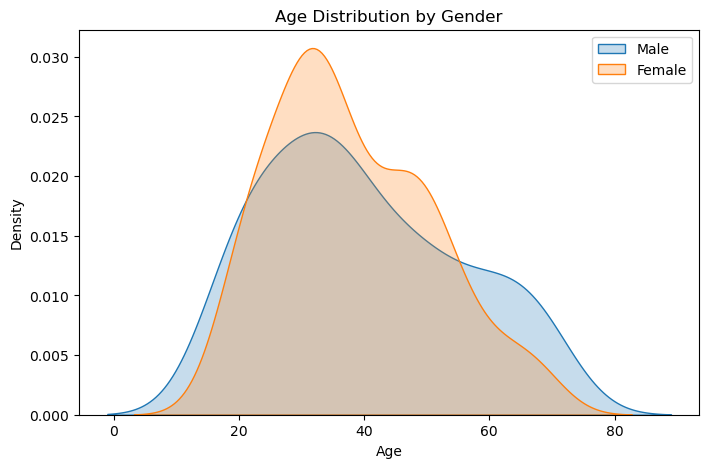

In [8]:
#sns.kdeplot(df['Age'], shade=True, hue=df['Gender'])


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.kdeplot(df[df['Gender'] == 'Male']['Age'], shade=True, label="Male")
sns.kdeplot(df[df['Gender'] == 'Female']['Age'], shade=True, label="Female")

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution by Gender")
plt.legend()
plt.show()


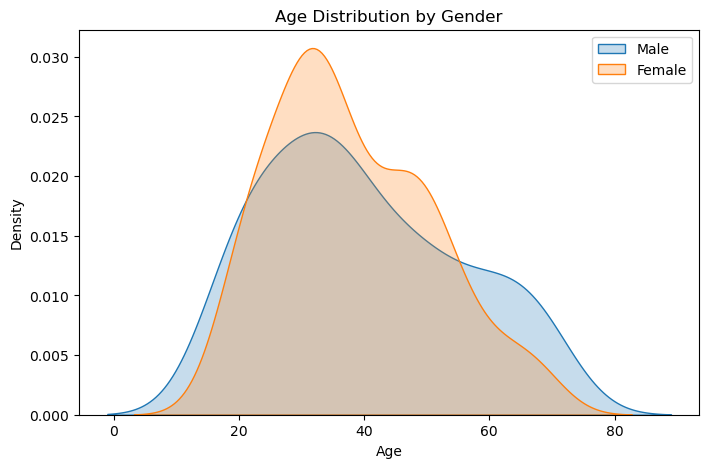

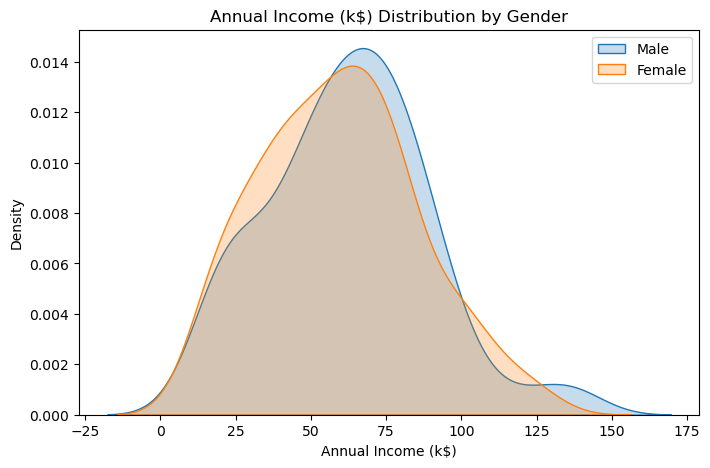

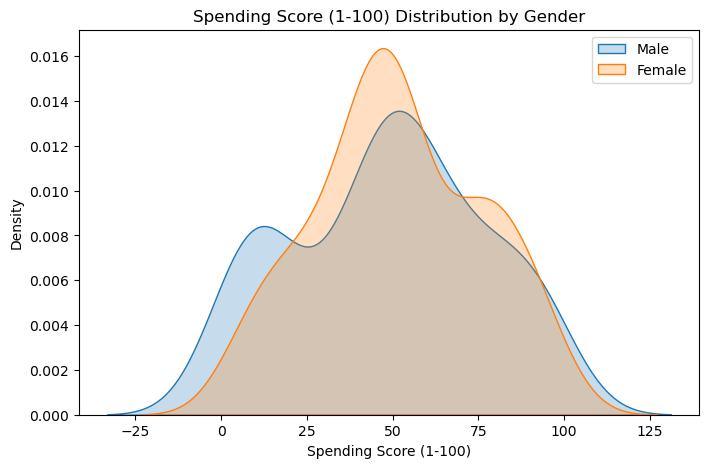

In [9]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for j in columns:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[df['Gender'] == 'Male'][j], shade=True, label="Male")
    sns.kdeplot(df[df['Gender'] == 'Female'][j], shade=True, label="Female")

    plt.xlabel(j)  # Dynamically set x-axis label
    plt.ylabel("Density")
    plt.title(f"{j} Distribution by Gender")  # Dynamic title
    plt.legend()
    plt.show()

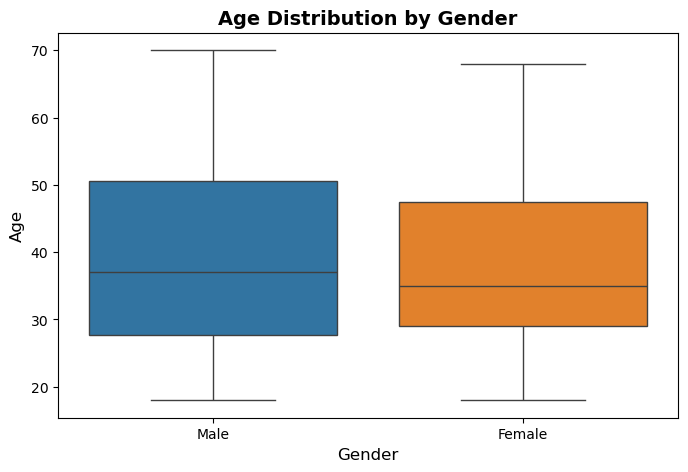

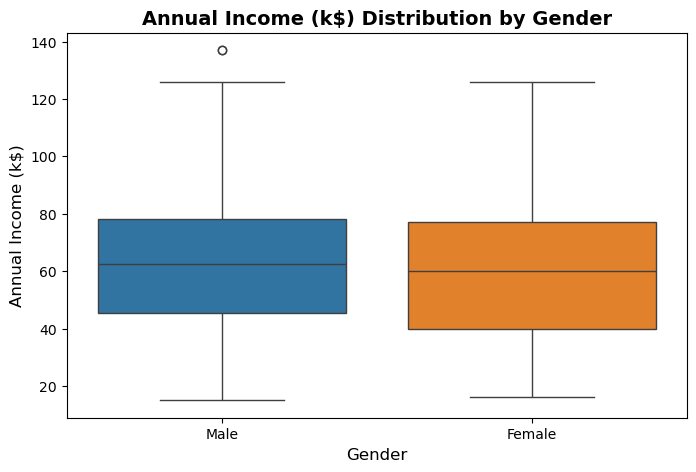

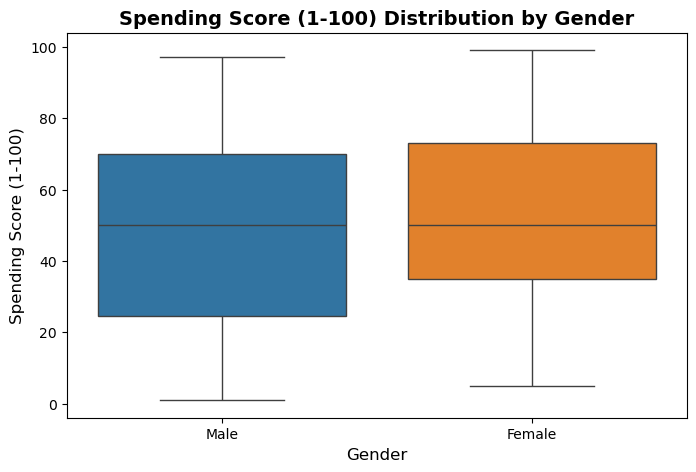

In [10]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Define colors for Male and Female
palette_colors = {"Male": "#1f77b4", "Female": "#ff7f0e"}

# Define columns to visualize
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for k in columns:
    plt.figure(figsize=(8, 5))
    
    # Create the boxplot with custom colors
    sns.boxplot(data=df, x='Gender', y=k, palette=palette_colors)
    
    # Dynamically set labels and title
    plt.xlabel("Gender", fontsize=12)
    plt.ylabel(k, fontsize=12)
    plt.title(f"{k} Distribution by Gender", fontsize=14, fontweight="bold")
    # Show the plot
    plt.show()


In [11]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

Bivariate Analysis will help us explore patterns and correlations in the dataset.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

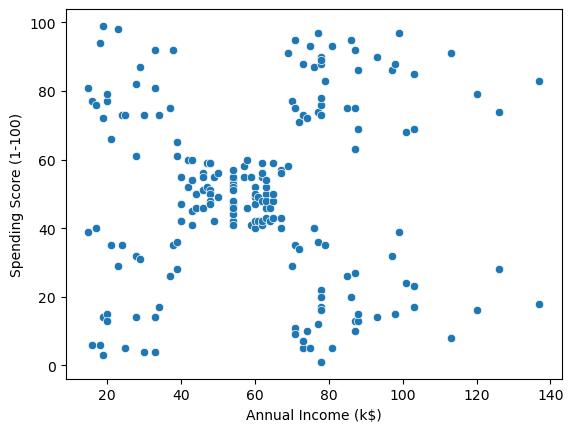

In [12]:
sns.scatterplot(df, x='Annual Income (k$)',y='Spending Score (1-100)' )

The scatter plot suggests the presence of clusters or groups of individuals with similar income and spending characteristics:

* A  cluster of individuals with low income and low spending scores.

* A cluster of individuals with high income and high spending scores.

* A cluster of individuals with moderate income and moderate spending scores.

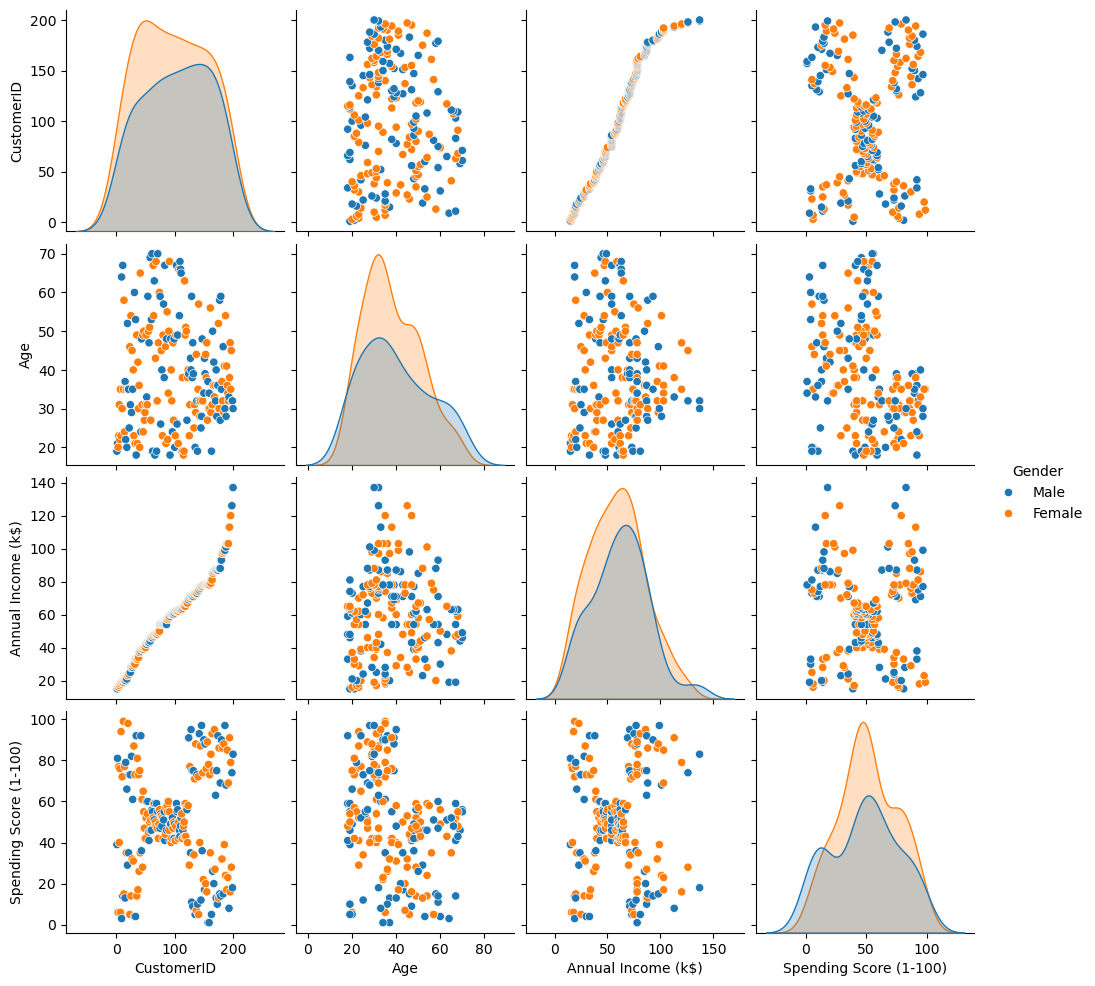

In [13]:
sns.pairplot(df,hue='Gender')


 It visualizes the pairwise relationships between numerical variables in the dataset while also differentiating the data points based on the 'Gender' column using color coding (blue for Male and orange for Female)

In [14]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [15]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000



Each value in the matrix represents the correlation coefficient (r) between the corresponding pair of variables. The correlation coefficient ranges from -1 to 1:

* +1 → Strong positive correlation (both variables increase together).
* -1 → Strong negative correlation (one increases, the other decreases).
* 0 → No correlation (variables are independent).

### Insight
* Younger customers tend to spend more, as shown by the negative correlation between Age and Spending Score.
* Income does not strongly influence spending habits, meaning high-income customers do not necessarily spend more.
* Age and income are weakly related, meaning income levels are relatively stable across different age groups.

<Axes: >

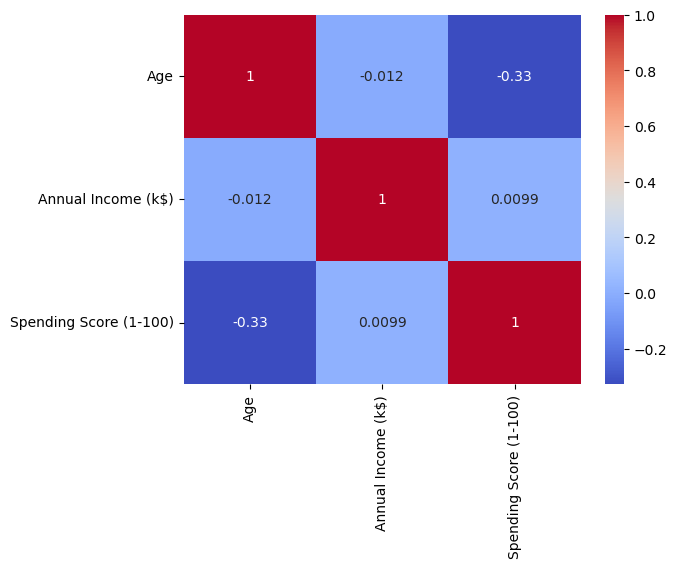

In [16]:
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr() ,annot=True,cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate


In [17]:
# initialize a K-Means clustering model with 3 clusters.
clustering1 = KMeans(n_clusters=3)

The algorithm will divide the data into three distinct groups based on similarities in Annual Income (k$).

In [18]:
# Fitting the Model to the Data
clustering1.fit(df[['Annual Income (k$)']])


KMeans(n_clusters=3)

.fit() applies the K-Means algorithm to cluster the Annual Income (k$) column.

In [19]:
# Extracting Cluster Labels
clustering1.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

* `clustering1.labels_` contains the cluster labels assigned to each data point.
* Each record in the dataset gets assigned a cluster number (0, 1, or 2) based on its income.

In [20]:
# 4. Storing Cluster Labels in the DataFrame
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


Each row gets assigned a cluster number (0, 1, or 2), grouping customers based on their Annual Income.

In [21]:
df['Income Cluster'].value_counts()


Income Cluster
2    90
0    74
1    36
Name: count, dtype: int64

In [22]:
clustering1.inertia_

23517.33093093093

The attribute clustering1.inertia_ returns the sum of squared distances between each data point and the centroid of the cluster it belongs to. This is also known as the "within-cluster sum of squares" (WCSS) and is used to measure how compact and tight the clusters are.

In [23]:
# computing the inertia score for different values of i (number of clusters) 
# The goal is to determine the optimal number of clusters (k) using the Elbow Method.

inertia_score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)



In [24]:
inertia_score

[137277.28000000006,
 48660.888888888876,
 25633.32148421722,
 13844.222098218703,
 9121.142857142859,
 5728.855832763729,
 4266.139171458057,
 3579.4810356310363,
 2396.9850649350674,
 1831.1106060606066]

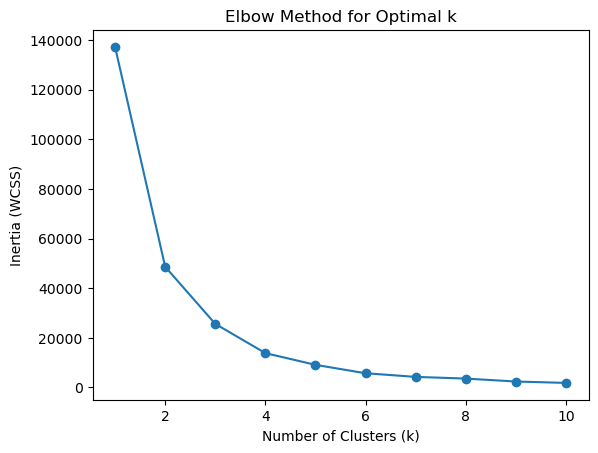

In [25]:
#Finding the Optimal k using the Elbow Method
plt.plot(range(1, 11), inertia_score, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

The elbow point is where the curve starts to bend, indicating the optimal number of clusters.

In [26]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [27]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


#### Insights from the Clusters
* Income is the main distinguishing factor across clusters.
* Spending Scores are relatively similar (ranging from 49.88 to 52.00), meaning that income might not have a strong effect on spending behavior.
* The low-income group spends almost the same as the high-income group, which might indicate that spending habits are not solely dependent on income.

### Bivariate Clustering


In [28]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,4


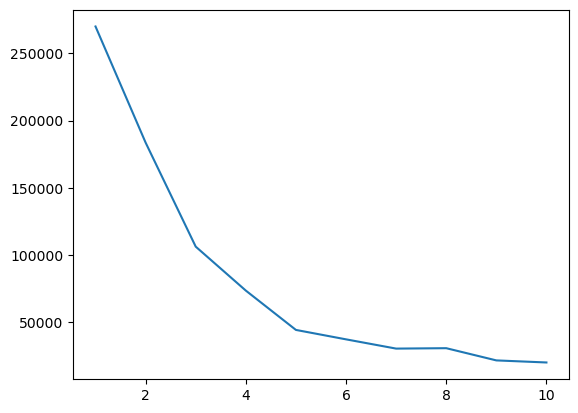

In [29]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [30]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

In [32]:
centers

,x,y
0,55.296296,49.518519
1,86.538462,82.128205
2,88.200000,17.114286
3,25.727273,79.363636
4,26.304348,20.913043


This centers extracts the cluster centers (centroids) from a K-Means clustering model (clustering2) and stores them in a DataFrame for easier interpretation and visualization.

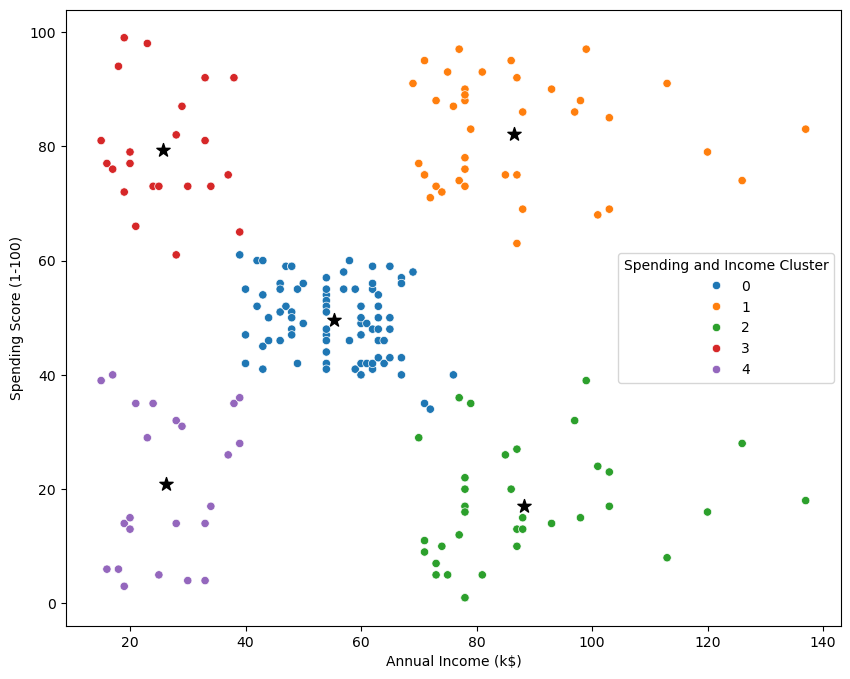

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [33]:
# creates a normalized crosstab (contingency table) to analyze the distribution 
# of Gender within each Spending and Income Cluster.
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')


Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


In [35]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [36]:
from sklearn.preprocessing import StandardScaler


The StandardScaler is used for feature scaling in machine learning, ensuring that all numerical features have a mean of 0 and a standard deviation of 1. This process is called standardization (z-score normalization).

In [37]:
scale = StandardScaler()


In [40]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,4


In [52]:
#encoding categorical variables into numerical format
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,4,True
1,2,21,15,81,0,3,True
2,3,20,16,6,0,4,False
3,4,23,16,77,0,3,False
4,5,31,17,40,0,4,False


Encoding categorical variables into numerical format is necessary for many machine learning models. The function pd.get_dummies() converts categorical columns into binary (0/1) variables.


In [53]:
dff.columns


Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [54]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [55]:
# scale (normalizes or standardizes) the dataset dff
dff = scale.fit_transform(dff)


In [56]:

dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


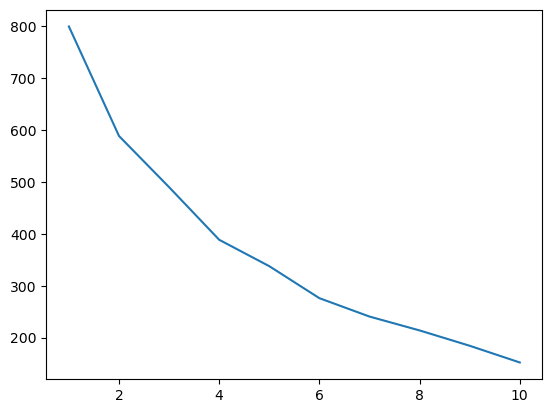

In [57]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [58]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1
196,197,Female,45,126,28,1,2
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,1,2


In [51]:
df.to_csv('Clustering.csv')
